In [1]:
ncase=1.3;
size=490;
time=12;

In [2]:
import cv2, imutils
import sys
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import compare_ssim 
from glob import glob
from scipy.spatial import distance
from sklearn.metrics import r2_score
import matplotlib.patches as patches
from PIL import Image

In [3]:
def find_if_close(cnt1,cnt2):
    row1,row2 = cnt1.shape[0],cnt2.shape[0]
    for i in range(row1):
        for j in range(row2):
            dist = np.linalg.norm(cnt1[i]-cnt2[j])
            if abs(dist) < 50 :
                return True
            elif i==row1-1 and j==row2-1:
                return False

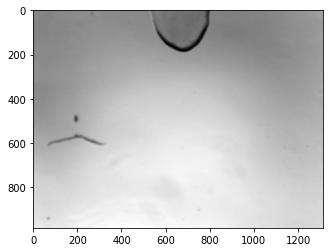

(985, 1312)

In [4]:
#selecting initial point
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

k0=0
in_fns = glob("./pictures/*.jpg") # Names of files
in_fns = sorted(in_fns) # Order them
fig,ax = plt.subplots(1)
(xi,yi,xf,yf)=(0,0,3280,2464)
#(xi,yi,xf,yf)=(0,800,1200,1700)
img0A = cv2.imread(in_fns[k0])[yi:yf,xi:xf]
img0B = cv2.imread(in_fns[k0+1])[yi:yf,xi:xf]
img0C = cv2.imread(in_fns[k0+2])[yi:yf,xi:xf]
img0D = cv2.imread(in_fns[k0+3])[yi:yf,xi:xf]
#img0 = cv2.imread(in_fns[0])[yi:yf,xi:xf]
#ax.imshow(img0)
#plt.show()
scale_percent=40
width = int(img0A.shape[1] * scale_percent / 100)
height = int(img0A.shape[0] * scale_percent / 100)
dim = (width, height)
img00A = cv2.GaussianBlur(cv2.cvtColor(cv2.resize(img0A, dim, interpolation = cv2.INTER_AREA), cv2.COLOR_BGR2GRAY), (21, 21), 0)
img00B = cv2.GaussianBlur(cv2.cvtColor(cv2.resize(img0B, dim, interpolation = cv2.INTER_AREA), cv2.COLOR_BGR2GRAY), (21, 21), 0)
img00C = cv2.GaussianBlur(cv2.cvtColor(cv2.resize(img0C, dim, interpolation = cv2.INTER_AREA), cv2.COLOR_BGR2GRAY), (21, 21), 0)
img00D = cv2.GaussianBlur(cv2.cvtColor(cv2.resize(img0D, dim, interpolation = cv2.INTER_AREA), cv2.COLOR_BGR2GRAY), (21, 21), 0)
ax.imshow(img00A,cmap='gray')
plt.show()
img00A.shape

In [5]:
(score, diff) = compare_ssim(img00A, img00B, full = True)
diff = (diff * 255).astype("uint8")
(score2, diff2) = compare_ssim(img00B, img00C, full = True)
diff2 = (diff2 * 255).astype("uint8")
(score3, diff3) = compare_ssim(img00C, img00D, full = True)
diff3 = (diff3 * 255).astype("uint8")
thresh = cv2.threshold(diff, 0, 255, # Threshold to clean
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] 
thresh2 = cv2.threshold(diff2, 0, 255, # Threshold to clean
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] 
thresh3 = cv2.threshold(diff3, 0, 255, # Threshold to clean
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] 

/Users/Susana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.
/Users/Susana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Susana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """


In [6]:
img=thresh
contours,hier = cv2.findContours(img.copy(),cv2.RETR_EXTERNAL,2)
#plt.imshow(cv2.drawContours(img, contours, -1, (0,255,0), 3),cmap='gray')
LENGTH=len(contours)
status = np.zeros((LENGTH,1))
for i,cnt1 in enumerate(contours):
    x = i    
    if i != LENGTH-1:
        for j,cnt2 in enumerate(contours[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status[i],status[x])
                status[x] = status[i] = val
            else:
                if status[x]==status[i]:
                    status[x] = i+1

unified = []
maximum = int(status.max())+1
for i in range(maximum):
    pos = np.where(status==i)[0]
    if pos.size != 0:
        cont = np.vstack(contours[i] for i in pos)
        hull = cv2.convexHull(cont)
        unified.append(hull)

/Users/Susana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [7]:
img=thresh2
contours,hier = cv2.findContours(img.copy(),cv2.RETR_EXTERNAL,2)
#plt.imshow(cv2.drawContours(img, contours, -1, (0,255,0), 3),cmap='gray')
LENGTH=len(contours)
status = np.zeros((LENGTH,1))
for i,cnt1 in enumerate(contours):
    x = i    
    if i != LENGTH-1:
        for j,cnt2 in enumerate(contours[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status[i],status[x])
                status[x] = status[i] = val
            else:
                if status[x]==status[i]:
                    status[x] = i+1

unified2 = []
maximum = int(status.max())+1
for i in range(maximum):
    pos = np.where(status==i)[0]
    if pos.size != 0:
        cont = np.vstack(contours[i] for i in pos)
        hull = cv2.convexHull(cont)
        unified2.append(hull)

/Users/Susana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [8]:
img=thresh3
contours,hier = cv2.findContours(img.copy(),cv2.RETR_EXTERNAL,2)
#plt.imshow(cv2.drawContours(img, contours, -1, (0,255,0), 3),cmap='gray')
LENGTH=len(contours)
status = np.zeros((LENGTH,1))
for i,cnt1 in enumerate(contours):
    x = i    
    if i != LENGTH-1:
        for j,cnt2 in enumerate(contours[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status[i],status[x])
                status[x] = status[i] = val
            else:
                if status[x]==status[i]:
                    status[x] = i+1

unified3 = []
maximum = int(status.max())+1
for i in range(maximum):
    pos = np.where(status==i)[0]
    if pos.size != 0:
        cont = np.vstack(contours[i] for i in pos)
        hull = cv2.convexHull(cont)
        unified3.append(hull)

/Users/Susana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [9]:
areamin=20000;
positions0=[];
areas0=[];
ejes0=[];
for i in range(0,len(unified)):
    if len(unified[i])>5:
        area=np.pi*cv2.fitEllipse(unified[i])[1][0]*cv2.fitEllipse(unified[i])[1][1]
        if area>areamin:
            positions0.append(cv2.fitEllipse(unified[i])[0])
            ejes0.append(cv2.fitEllipse(unified[i])[1])
            areas0.append(np.pi*cv2.fitEllipse(unified[i])[1][0]*cv2.fitEllipse(unified[i])[1][1])
positions1=[];
areas1=[];
ejes1=[];
for i in range(0,len(unified2)):
    if len(unified2[i])>5:
        area=np.pi*cv2.fitEllipse(unified2[i])[1][0]*cv2.fitEllipse(unified2[i])[1][1]
        if area>areamin:
            positions1.append(cv2.fitEllipse(unified2[i])[0])
            ejes1.append(cv2.fitEllipse(unified2[i])[1])
            areas1.append(np.pi*cv2.fitEllipse(unified2[i])[1][0]*cv2.fitEllipse(unified2[i])[1][1])
positions2=[];
areas2=[];
ejes2=[];
for i in range(0,len(unified3)):
    if len(unified3[i])>5:
        area=np.pi*cv2.fitEllipse(unified3[i])[1][0]*cv2.fitEllipse(unified3[i])[1][1]
        if area>areamin:
            positions2.append(cv2.fitEllipse(unified3[i])[0])
            ejes2.append(cv2.fitEllipse(unified3[i])[1])
            areas2.append(np.pi*cv2.fitEllipse(unified3[i])[1][0]*cv2.fitEllipse(unified3[i])[1][1])

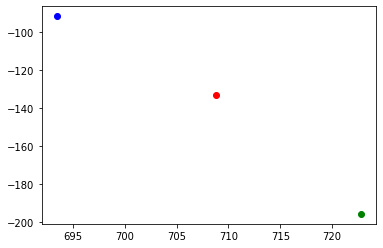

In [10]:
plt.plot(np.transpose(positions0)[0],-np.transpose(positions0)[1],'bo')
plt.plot(np.transpose(positions1)[0],-np.transpose(positions1)[1],'ro')
plt.plot(np.transpose(positions2)[0],-np.transpose(positions2)[1],'go')

In [11]:
dmin=20;
clst0=[];
for i in range(0,len(positions0)):
    distmin0=ejes0[i][1]/2;
    for  j in range(0,len(positions1)):
        distmin1=ejes1[j][1]/2;
        dist=distance.euclidean(positions0[i],positions1[j])
        if dmin<dist<distmin0 or dmin<dist<distmin1:
            clst0.append([i,j])

clst1=[];
size1=[];
for i in range(0,len(positions2)):
    distmin2=ejes2[i][1]/2;
    for j in range(0,len(clst0)):
        distmin1=ejes1[clst0[j][1]][1]/2;
        dist1=distance.euclidean(positions2[i],positions0[clst0[j][0]])
        dist2=distance.euclidean(positions2[i],positions1[clst0[j][1]])
        if dmin<dist1<distmin2 and dmin<dist2<distmin2:
            clst1.append([positions0[clst0[j][0]],positions1[clst0[j][1]],positions2[i]])
            size1.append(ejes0[clst0[j][1]][0])
        elif dmin<dist2<distmin2 and dmin<dist2<distmin1:
            clst1.append([positions0[clst0[j][0]],positions1[clst0[j][1]],positions2[i]])
            size1.append(ejes0[clst0[j][1]][0])
error=[];
for i in range(0,len(clst1)):
    model=np.polyfit(np.transpose(clst1[i])[0],np.transpose(clst1[i])[1],1)
    predict = np.poly1d(model)
    error.append(r2_score(np.transpose(clst1[i])[1], predict(np.transpose(clst1[i])[0])))
j=[];
for i in range(0,len(clst1)):
    #select only lines
    if error[i]>0.9:
        j.append(i);
clst=[];
size=[];
for i in range(0,len(j)):
    clst.append(clst1[j[i]])
    size.append(size1[j[i]])
#initial points DDD:
heads=[i[0] for i in clst]
heads

[(693.4310302734375, 91.69354248046875)]

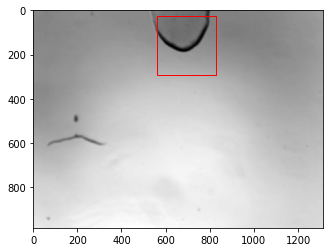

In [18]:
#now we start with a the nhead head
nhead=0;
fig,ax = plt.subplots(1)
h,w=1*size[nhead],1*size[nhead]
xmin=heads[nhead][0]-(w/2)
ymin=heads[nhead][1]-(h/4)
rect = patches.Rectangle((xmin,ymin),w,h,linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.imshow(img00A,cmap='gray')
ax.add_patch(rect)
plt.show()

In [22]:
in_fns = glob("./pictures/*.jpg") # Names of files
in_fns = sorted(in_fns) # Order them
imgAll=[];
img0 = cv2.imread(in_fns[0])[yi:yf,xi:xf]
scale_percent=40
width = int(img0.shape[1] * scale_percent / 100)
height = int(img0.shape[0] * scale_percent / 100)
dim = (width, height)
img00 = cv2.resize(img0, dim, interpolation = cv2.INTER_AREA)
imgAll.append(img00)
for i in range(1,len(in_fns)):
    img0 = cv2.imread(in_fns[i])[yi:yf,xi:xf]
    img00 = cv2.resize(img0, dim, interpolation = cv2.INTER_AREA)
    imgAll.append(img00)

In [23]:
if __name__ == '__main__' :
 
    tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
    tracker_type = tracker_types[3]
 
    if tracker_type == 'BOOSTING':
        tracker = cv2.TrackerBoosting_create()
    if tracker_type == 'MIL':
        tracker = cv2.TrackerMIL_create()
    if tracker_type == 'KCF':
        tracker = cv2.TrackerKCF_create()
    if tracker_type == 'TLD':
        tracker = cv2.TrackerTLD_create()
    if tracker_type == 'MEDIANFLOW':
        tracker = cv2.TrackerMedianFlow_create()
    if tracker_type == 'GOTURN':
        tracker = cv2.TrackerGOTURN_create()
    if tracker_type == 'MOSSE':
        tracker = cv2.TrackerMOSSE_create()
    if tracker_type == "CSRT":
        tracker = cv2.TrackerCSRT_create()
    
    height , width , layers = imgAll[0].shape
    Data = np.zeros([len(imgAll),2])
    video = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 20, (width, height))

    
    img = cv2.cvtColor(imgAll[0], cv2.COLOR_BGR2GRAY)
    frame = cv2.GaussianBlur(img, (21, 21), 0)
    bbox = (xmin, ymin, w, h)
    #bbox = cv2.selectROI(frame, False)
    
    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)
    Data[0]=bbox[0]+bbox[2]/2,bbox[1]+bbox[3]/2
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(imgAll[0], p1, p2, (0,255,0), 2, 1)
    print(0,p1,p2) 
    video.write(imgAll[0])
    
    for m in range(1,len(imgAll)):
        img = cv2.cvtColor(imgAll[m], cv2.COLOR_BGR2GRAY)
        frame = cv2.GaussianBlur(img, (21, 21), 0)
        ok, bbox = tracker.update(frame)
        if ok:
            # Tracking success
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            #cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
        else :
             #Tracking failure
            print('Tracking failure detected')
            np.savez('data', Data)
            video.release()
            sys.exit()
        #assign final value
        Data[m] = np.array([(p1[0]+p2[0])/2,(p1[1]+p2[1])/2])
        cv2.rectangle(imgAll[m], p1, p2, (0,255,0), 2, 1)
        print(m,p1,p2) 
        video.write(imgAll[m])

    np.savez('data', Data)
    video.release()

0 (560, 25) (826, 291)
1 (599, 106) (813, 320)
2 (659, 213) (838, 392)
3 (620, 256) (834, 470)
4 (683, 386) (832, 534)
5 (695, 427) (873, 606)
6 (743, 534) (891, 683)
7 (817, 594) (941, 718)
8 (825, 691) (928, 794)
9 (860, 764) (963, 868)
10 (887, 835) (990, 939)
11 (232, 555) (292, 615)


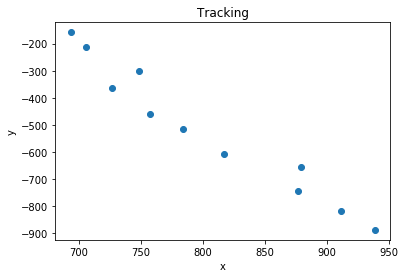

In [25]:
Data2=Data[0:11]
plt.title('Tracking')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.transpose(Data2)[0],-np.transpose(Data2)[1],'o')

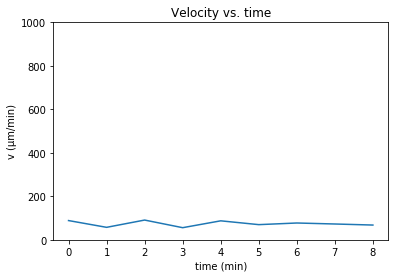

(74.11915546887121, 12.237347939324959)

In [26]:
vel=[]
scale=1400
for i in range(1,len(Data2)-1):
    dist=distance.euclidean((Data2[i][0],Data2[i][1]),(Data2[i+1][0],Data2[i+1][1]))
    dist2=dist*(100000/(2*scale*scale_percent))
    vel.append(dist2)
plt.ylim(0, 1000)
plt.plot(vel)
plt.title('Velocity vs. time')
plt.xlabel('time (min)')
plt.ylabel('v (µm/min)')
plt.show()
np.mean(vel),np.std(vel)

In [17]:
#ncase,nData,Size,Time,meanV,meanStd
data=[ncase,len(Data2),size,time,np.mean(vel),np.std(vel)]
np.savetxt('data'+str(ncase)+'.dat', data)

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')